# 쇼핑몰 프로모션 효율 예측 분석

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [33]:
mem = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/member.csv")
tran = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv")

In [34]:
mem.head(2)

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0


In [35]:
tran.head(2)

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000


* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터를 수집
* mem: 고객id, 최근 방문일, 사는지역, 추천여부, 주요접속채널, 쿠폰 사용 여부
* transaction: 고객id, 구매수량, 총 구매금액 정보가 있음
* 전통적 마케팅 분석 방법인 RFM 기법을 사용해 고객 데이터에서 파생변수 생성 후 분석
* Recency: 현재일 - 최근 구매일
* Frequency: 구매 빈도
* Monetary: 구매 금액


In [36]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [37]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [38]:
mem.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


<Axes: >

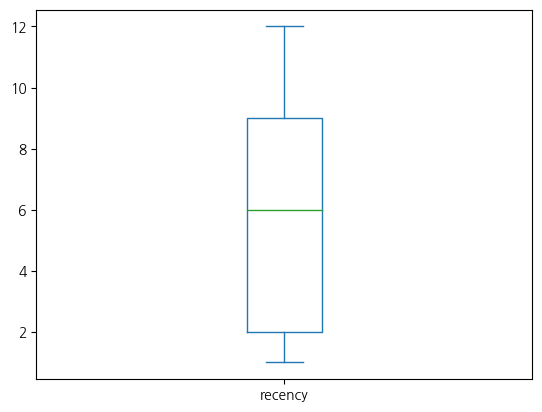

In [39]:
mem['recency'].plot(kind='box')

In [40]:
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


<Axes: >

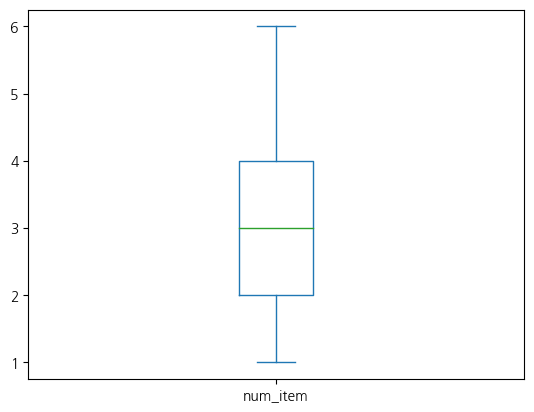

In [41]:
tran['num_item'].plot(kind='box')

<Axes: >

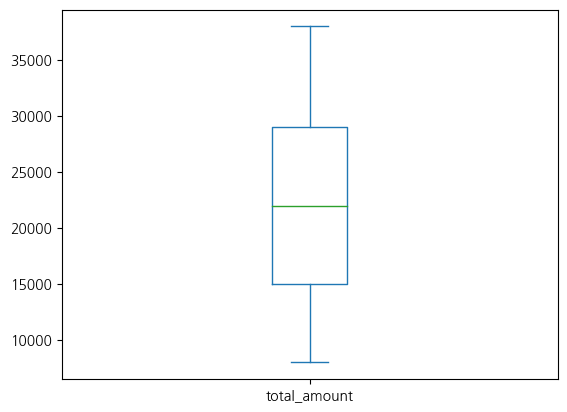

In [42]:
tran['total_amount'].plot(kind='box')

In [43]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [44]:
tran_total = tran.groupby('id')[['num_item','total_amount']].sum()

In [45]:
tran_total['mean_amount'] = tran_total['total_amount'] // tran_total['num_item']

In [46]:
tran_total

,num_item,total_amount,mean_amount
id,,,
100001,7,52000,7428
100008,5,26000,5200
100032,8,62000,7750
100036,15,129000,8600
100070,13,85000,6538
...,...,...,...
999932,5,32000,6400
999981,8,91000,11375
999990,9,84000,9333


In [47]:
frequency = tran['id'].value_counts()

In [48]:
print(type(frequency))

<class 'pandas.core.series.Series'>


In [49]:
frequency = pd.DataFrame(frequency)
frequency

,count
id,
691067,5
720147,5
422265,5
670720,5
154620,5
...,...
881780,1
154471,1
480462,1


In [50]:
tran_total = tran_total.join(frequency, on='id')

In [51]:
tran_total = tran_total.rename(columns={'count':'frequency'})

In [52]:
tran_total

,num_item,total_amount,mean_amount,frequency
id,,,,
100001,7,52000,7428,2
100008,5,26000,5200,1
100032,8,62000,7750,3
100036,15,129000,8600,5
100070,13,85000,6538,4
...,...,...,...,...
999932,5,32000,6400,1
999981,8,91000,11375,4
999990,9,84000,9333,3


In [53]:
data = pd.merge(mem, tran_total, how='inner', on='id')

In [54]:
data

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,mean_amount,frequency
0,906145,10,Surburban,0,Phone,0,10,94000,9400,3
1,184478,6,Rural,1,Web,0,4,29000,7250,1
2,394235,7,Surburban,1,Web,0,8,41000,5125,2
3,130152,9,Rural,1,Web,0,7,83000,11857,4
4,940352,2,Urban,0,Web,0,3,31000,10333,1
...,...,...,...,...,...,...,...,...,...,...
63995,838295,10,Urban,0,Web,0,14,104000,7428,4
63996,547316,5,Urban,1,Phone,0,9,89000,9888,5
63997,131575,6,Urban,1,Phone,0,8,61000,7625,2
63998,603659,1,Surburban,1,Multichannel,0,16,108000,6750,5


In [55]:
!pip install ydata-profiling

In [56]:
from ydata_profiling import ProfileReport

In [57]:
pf = ProfileReport(data)
pf.to_file('test.html')

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 125.06it/s]


In [58]:
data['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

In [59]:
data.groupby('zip_code')['conversion'].value_counts(sort=False)

zip_code   conversion
Rural      0              7764
           1              1799
Surburban  0             24749
           1              4027
Urban      0             22093
           1              3568
Name: count, dtype: int64

In [60]:
def c_ratio(x):
    for idx, item in zip(x.index, x):
        if idx[1] == 0:
            under_50 = item
        else:
            upper_50 = item
            class_ratio = upper_50/(upper_50+under_50) * 100
            print(idx, f'{class_ratio:.2f}%')

In [61]:
c_ratio(data.groupby('zip_code')['conversion'].value_counts(sort=False))

('Rural', 1) 18.81%
('Surburban', 1) 13.99%
('Urban', 1) 13.90%


In [62]:
data.groupby('zip_code')[['num_item','total_amount','mean_amount','frequency']].mean()

,num_item,total_amount,mean_amount,frequency
zip_code,,,,
Rural,9.677298,68149.325525,8036.516156,3.109380
Surburban,9.438873,67007.541006,8096.941514,3.068529
Urban,9.421924,66965.706714,8144.102841,3.070847


In [63]:
data['channel'].value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

In [64]:
data.groupby('channel')[['num_item','total_amount','mean_amount','frequency']].mean()

,num_item,total_amount,mean_amount,frequency
channel,,,,
Multichannel,9.473718,67182.169544,8106.270549,3.063772
Phone,9.416937,66936.155027,8129.841619,3.073445
Web,9.516462,67379.310345,8084.114257,3.080909


In [65]:
data.groupby('is_referral')['conversion'].value_counts(sort=False)

is_referral  conversion
0            0             26343
             1              5513
1            0             28263
             1              3881
Name: count, dtype: int64

In [66]:
c_ratio(data.groupby('is_referral')['conversion'].value_counts(sort=False))

(0, 1) 17.31%
(1, 1) 12.07%


In [67]:
data = pd.get_dummies(data, columns=["zip_code", "channel"], drop_first=True)

In [68]:
data.head()

,id,recency,is_referral,conversion,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,906145,10,0,0,10,94000,9400,3,True,False,True,False
1,184478,6,1,0,4,29000,7250,1,False,False,False,True
2,394235,7,1,0,8,41000,5125,2,True,False,False,True
3,130152,9,1,0,7,83000,11857,4,False,False,False,True
4,940352,2,0,0,3,31000,10333,1,False,True,False,True


In [69]:
X = data.drop(['id', 'conversion'], axis=1)
y = data['conversion']

In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [71]:
scale = MinMaxScaler()
X_mx_scaled = scale.fit_transform(X)
scale2 = StandardScaler()
X_std_scaled = scale2.fit_transform(X)

In [72]:
X_mx_scaled = pd.DataFrame(X_mx_scaled, columns=X.columns)
X_mx_scaled.head()

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,0.818182,0.0,0.333333,0.488636,0.233533,0.50,1.0,0.0,1.0,0.0
1,0.454545,1.0,0.111111,0.119318,0.169162,0.00,0.0,0.0,0.0,1.0
2,0.545455,1.0,0.259259,0.187500,0.105539,0.25,1.0,0.0,0.0,1.0
3,0.727273,1.0,0.222222,0.426136,0.307096,0.75,0.0,0.0,0.0,1.0
4,0.090909,0.0,0.074074,0.130682,0.261467,0.00,0.0,1.0,0.0,1.0


In [73]:
X_std_scaled = pd.DataFrame(X_std_scaled, columns=X.columns)
X_std_scaled.head()

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,1.207751,-1.00451,0.105664,0.797515,0.295355,-0.054589,1.106380,-0.818119,1.133138,-0.888008
1,0.067359,0.99551,-1.085368,-1.133973,-0.195694,-1.499455,-0.903849,-0.818119,-0.882505,1.126116
2,0.352457,0.99551,-0.291347,-0.777391,-0.681032,-0.777022,1.106380,-0.818119,-0.882505,1.126116
3,0.922653,0.99551,-0.489852,0.470648,0.856521,0.667844,-0.903849,-0.818119,-0.882505,1.126116
4,-1.073034,-1.00451,-1.283873,-1.074543,0.508447,-1.499455,-0.903849,1.222316,-0.882505,1.126116


In [74]:
from sklearn.model_selection import train_test_split

In [104]:
# minmax 스케일링 한 데이터셋
X_train, X_test, y_train, y_test = train_test_split(X_mx_scaled, y, test_size= 0.4, random_state = 10)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size= 0.5, random_state = 10)

In [76]:
# Standard 스케일링 한 데이터셋
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_std_scaled, y, test_size= 0.3, random_state = 10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_test2, y_test2, test_size= 0.5, random_state = 10)

In [77]:
y.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [78]:
9394 / (9394+54606) * 100

14.678125

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
rfc_mx = RandomForestClassifier(n_estimators=1000, max_depth=3, n_jobs=-1, random_state=10)
rfc_mx.fit(X_train, y_train)
pred_mx = rfc_mx.predict(X_valid)
print(accuracy_score(y_valid, pred_mx))
print(confusion_matrix(y_valid, pred_mx))
print(classification_report(y_valid, pred_mx))

0.8496875
[[8157    0]
 [1443    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8157
           1       0.00      0.00      0.00      1443

    accuracy                           0.85      9600
   macro avg       0.42      0.50      0.46      9600
weighted avg       0.72      0.85      0.78      9600



C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
rfc_std = RandomForestClassifier(n_estimators=1000, max_depth=3, n_jobs=-1, random_state=10)
rfc_std.fit(X_train2, y_train2)
pred_std = rfc_std.predict(X_valid2)
print(accuracy_score(y_valid2, pred_std))
print(confusion_matrix(y_valid2, pred_std))
print(classification_report(y_valid2, pred_std))

0.8496875
[[8157    0]
 [1443    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8157
           1       0.00      0.00      0.00      1443

    accuracy                           0.85      9600
   macro avg       0.42      0.50      0.46      9600
weighted avg       0.72      0.85      0.78      9600



C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from xgboost import XGBClassifier
xgb_mx = XGBClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10)
xgb_mx.fit(X_train, y_train)
pred_xgb_mx = xgb_mx.predict(X_valid)
print(accuracy_score(y_valid, pred_xgb_mx))
print(classification_report(y_valid, pred_xgb_mx))

0.8638541666666667
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.73      0.15      0.25      1443

    accuracy                           0.86      9600
   macro avg       0.80      0.57      0.59      9600
weighted avg       0.85      0.86      0.82      9600



In [83]:
from xgboost import XGBClassifier
xgb_std = XGBClassifier(n_estimators= 1000, n_jobs=-1, learning_rate=0.01, random_state=10)
xgb_std.fit(X_train2, y_train2)
pred_xgb_std = xgb_std.predict(X_valid2)
print(accuracy_score(y_valid2, pred_xgb_std))
print(classification_report(y_valid2, pred_xgb_std))

0.8638541666666667
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.73      0.15      0.25      1443

    accuracy                           0.86      9600
   macro avg       0.80      0.57      0.59      9600
weighted avg       0.85      0.86      0.82      9600



# 하이퍼 파라미터 튜닝

## 그리드서치
* manual Search에 비해, Grid Search는 체계적인 방식으로 하이퍼파라미터 최적화를 수행
* Grid Search는 모든 parameter의 경우의 수에 대해 Cross-validation 결과가 가장 좋은 parameter를 고르는 방법
* 전체 탐색 대상 구간, 간격은 분석가의 지정이 필요하나 균등하고 전역적인 탐색이 가능하다는 장점이 있음.
* 단, 하이퍼파라미터의 갯수가 많아질수록 전체 탐색 시간이 기하급수적으로 증가

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
params = dict(max_depth=[3,5,10], n_estimators=[100, 500, 1000], learning_rate=[0.01, 0.05, 0.1])
params

{'max_depth': [3, 5, 10],
 'n_estimators': [100, 500, 1000],
 'learning_rate': [0.01, 0.05, 0.1]}

In [86]:
grid_cv = GridSearchCV(xgb_mx, param_grid=params, cv=5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_valid)
print(sorted(grid_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print(f'최고 예측 정확도: {grid_cv.best_score_ :.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
최고 예측 정확도: 0.8673


In [87]:
from xgboost import XGBClassifier
xgb_mx = XGBClassifier(max_depth = 3, n_estimators= 500, n_jobs=-1, learning_rate=0.05, random_state=10)
xgb_mx.fit(X_train, y_train)
pred_xgb_mx = xgb_mx.predict(X_valid)
print(accuracy_score(y_valid, pred_xgb_mx))
print(classification_report(y_valid, pred_xgb_mx))

0.8654166666666666
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.77      0.15      0.25      1443

    accuracy                           0.87      9600
   macro avg       0.82      0.57      0.59      9600
weighted avg       0.85      0.87      0.82      9600



## 랜덤서치
* GridSearch가 전수조사라면 RandomSearch는 표본조사
* 하이퍼파라미터 값을 랜덤 샘플링해 선정
* RandomSearch는 GridSearch에 비해 불필요한 반복 수행 횟수를 대폭줄이면서, 동시에 정해진 간격 사이에 위치한 값들에 대해서도 확률적으로 탐색이 가능하므로 최적 하이퍼파라미터를 더 빨리 찾을 수 있다.


In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
rand_cv = RandomizedSearchCV(xgb_mx, param_distributions=params, n_iter=27, cv=5, n_jobs=-1, verbose=3)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_valid)
print(sorted(rand_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_ :.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05}
최고 예측 정확도: 0.8673


In [90]:
from xgboost import XGBClassifier
xgb_mx = XGBClassifier(max_depth = 3, n_estimators= 500, n_jobs=-1, learning_rate=0.05, random_state=10)
xgb_mx.fit(X_train, y_train)
pred_xgb_mx = xgb_mx.predict(X_valid)
print(accuracy_score(y_valid, pred_xgb_mx))
print(classification_report(y_valid, pred_xgb_mx))

0.8654166666666666
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.77      0.15      0.25      1443

    accuracy                           0.87      9600
   macro avg       0.82      0.57      0.59      9600
weighted avg       0.85      0.87      0.82      9600



In [91]:
pred_xgb_mx = xgb_mx.predict(X_test)
print(accuracy_score(y_test, pred_xgb_mx))
print(classification_report(y_test, pred_xgb_mx))

0.8664583333333333
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8191
           1       0.74      0.14      0.23      1409

    accuracy                           0.87      9600
   macro avg       0.80      0.57      0.58      9600
weighted avg       0.85      0.87      0.83      9600



## 베이지안 옵티마이저
* Bayesian Optimiztion은 베이즈 정리에 의해서 사후 확률을 통해 최적값을 예측해 최적 파라미터를 업데이트


In [92]:
X_train3 = X_train.to_numpy(dtype='int') 
y_train3 = y_train.to_numpy(dtype='int') 

In [93]:
X_train3.dtype

dtype('int32')

In [94]:
# from skopt import BayesSearchCV

In [95]:
# bocv = BayesSearchCV(xgb_mx, search_spaces=params, cv=5, n_jobs=-1, verbose=3)
# bocv.fit(X_train3, y_train3)
# print(f"val score: {bocv.best_score_:.4f}")
# print(f"test score: {bocv.score(X_valid, y_valid)}")
# print(f"최적 하이퍼파라미터: {bocv.best_params_}")

In [96]:
y.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [98]:
y_res.value_counts()

conversion
0    38258
1    38258
Name: count, dtype: int64

In [99]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_res, y_res, test_size=0.4, random_state=10)

In [100]:
rand_cv = RandomizedSearchCV(xgb_mx, param_distributions=params, n_iter=27, cv=5, n_jobs=-1, verbose=3)
rand_cv.fit(X_train_smt, y_train_smt)
pred = rand_cv.predict(X_test_smt)
print(sorted(rand_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_ :.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1}
최고 예측 정확도: 0.8794


In [101]:
xgb_mx = XGBClassifier(max_depth = 10, n_estimators= 500, n_jobs=-1, learning_rate=0.1, random_state=10)
xgb_mx.fit(X_train_smt, y_train_smt)
pred_xgb_mx_smt = xgb_mx.predict(X_test_smt)
print(accuracy_score(y_test_smt, pred_xgb_mx_smt))
print(classification_report(y_test_smt, pred_xgb_mx_smt))

0.887411376482504
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     15298
           1       0.92      0.85      0.88     15309

    accuracy                           0.89     30607
   macro avg       0.89      0.89      0.89     30607
weighted avg       0.89      0.89      0.89     30607



In [102]:
pred_xgb_mx_smt_test = xgb_mx.predict(X_test)
print(accuracy_score(y_test, pred_xgb_mx_smt_test))
print(classification_report(y_test, pred_xgb_mx_smt_test))

0.8292708333333333
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8191
           1       0.38      0.27      0.31      1409

    accuracy                           0.83      9600
   macro avg       0.63      0.60      0.61      9600
weighted avg       0.81      0.83      0.82      9600



In [105]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res2, y_res2 = cc.fit_resample(X_train, y_train)

In [106]:
y_res2.value_counts()

conversion
0    5615
1    5615
Name: count, dtype: int64

In [107]:
rand_cv = RandomizedSearchCV(xgb_mx, param_distributions=params, n_iter=27, cv=5, n_jobs=-1, verbose=3)
rand_cv.fit(X_res2, y_res2)
pred = rand_cv.predict(X_valid)
print(sorted(rand_cv.cv_results_.keys()))
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고 예측 정확도: {rand_cv.best_score_ :.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼 파라미터:  {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1}
최고 예측 정확도: 0.7612


In [108]:
xgb_mx = XGBClassifier(max_depth = 3, n_estimators= 1000, n_jobs=-1, learning_rate=0.1, random_state=10)
xgb_mx.fit(X_res2, y_res2)
pred_xgb_mx_smt = xgb_mx.predict(X_test)
print(accuracy_score(y_test, pred_xgb_mx_smt))
print(classification_report(y_test, pred_xgb_mx_smt))

0.523671875
              precision    recall  f1-score   support

           0       0.95      0.47      0.63     10953
           1       0.21      0.85      0.34      1847

    accuracy                           0.52     12800
   macro avg       0.58      0.66      0.48     12800
weighted avg       0.84      0.52      0.59     12800

